In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from ipywidgets import *
import seaborn as sns
import autolens as al
sns.set_theme()
sns.set(font_scale=1.3)

%matplotlib inline

In [2]:
test_dataset = pd.read_csv('./test_dataset.csv')
test_dataset.head()

,Unnamed: 0,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,ccd_gain-g,...,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-i,PLANE_2-REDSHIFT-i,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z,PLANE_1-REDSHIFT-Y,PLANE_2-REDSHIFT-Y
0,1501,1502,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964
1,2586,2587,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668
2,2653,2654,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295
3,1055,1056,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602
4,705,706,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067


In [3]:
imfit_lens_light_ell = pd.read_csv('./fits_results/lens_light_ellsersic/lens_light_report.csv',
                                   names=['OBJID', 'x0', 'y0', 'PA', 'ell', 'n', 'I_e', 'r_e', 'radius', 'chiquad_dof'])
imfit_lens_light_sph = pd.read_csv('./fits_results/lens_light_sphsersic/lens_light_report.csv',
                                   names=['OBJID', 'x0', 'y0', 'PA', 'ell', 'n', 'I_e', 'r_e', 'radius', 'chiquad_dof'])

In [4]:
imfit_lens_light_ell.head()

,OBJID,x0,y0,PA,ell,n,I_e,r_e,radius,chiquad_dof
0,2587,49.887180,49.888370,165.350839,1.000000,1.499790,-4.936725,1.000000,0.820621,86.779754
1,2654,49.692192,49.699216,138.417200,1.000000,1.308567,-26.464720,1.000000,0.521584,643.251890
2,706,49.880853,49.895038,180.000000,1.000000,1.480076,-51.800357,1.000000,0.663608,716.598347
3,107,49.888928,49.846701,174.480263,1.000000,1.300644,-0.626715,1.000000,0.804893,38.829875
4,2414,50.476491,50.470250,154.255792,0.240776,0.542747,19.355868,3.601559,0.655940,0.018177


In [5]:
def rotate_matrix(m):
    return [[m[jj][ii] for jj in range(len(m))] for ii in range(len(m)-1,-1,-1)]

In [6]:
def update_graph(i):
    fig, ax = plt.subplots(6, 3, figsize=(6, 8), facecolor='white')
    name = str(imfit_lens_light_ell['OBJID'][i])

    print('Object ID:',name)
    norm = 1
    get_sph = utils.getlenslight(pre_path='./fits_results/lens_light_sphsersic/', cutout_name=name)
    fits_matrix_sph_autolens = np.log10(get_sph.read_cutout(model='SPHSERSIC', method='AutoLens')+norm)
    fits_matrix_sph_imfit = np.log10(get_sph.read_cutout(model='SPHSERSIC', method='ImFit')+norm)
    fits_matrix_sph_galfit = np.log10(get_sph.read_cutout(model='SPHSERSIC', method='Galfit')+norm)

    get_ell = utils.getlenslight(pre_path='./fits_results/lens_light_ellsersic/', cutout_name=name)
    fits_matrix_ell_autolens = np.log10(get_ell.read_cutout(model='ELLSERSIC', method='AutoLens')+norm)
    fits_matrix_ell_autolens = rotate_matrix(fits_matrix_ell_autolens)
    fits_matrix_ell_autolens = rotate_matrix(fits_matrix_ell_autolens)
    fits_matrix_ell_imfit = np.log10(get_ell.read_cutout(model='ELLSERSIC', method='ImFit')+norm)
    fits_matrix_ell_imfit = rotate_matrix(fits_matrix_ell_imfit)
    fits_matrix_ell_imfit = rotate_matrix(fits_matrix_ell_imfit)
    fits_matrix_ell_galfit = np.log10(get_ell.read_cutout(model='ELLSERSIC', method='Galfit')+norm)
    fits_matrix_ell_galfit = rotate_matrix(fits_matrix_ell_galfit)
    fits_matrix_ell_galfit = rotate_matrix(fits_matrix_ell_galfit)
    
    #get_sph_nomask = utils.getlenslight(pre_path='./fits_results/lens_light_sphsersic_nomask/', cutout_name=name)
    #fits_matrix_sph_autolens_nomask = np.log10(get_sph_nomask.read_cutout(model='SPHSERSIC_nomask', method='AutoLens')+norm)
    #fits_matrix_sph_imfit_nomask = np.log10(get_sph_nomask.read_cutout(model='SPHSERSIC_nomask', method='ImFit')+norm)
    
    modelized_lens_light = [fits_matrix_sph_autolens, fits_matrix_sph_imfit, fits_matrix_sph_galfit, fits_matrix_ell_autolens, fits_matrix_ell_imfit, fits_matrix_ell_galfit]
    model_names = ['SPH AutoLens', 'SPH ImFit', 'SPH Galfit', 'ELL AutoLens', 'ELL ImFit', 'ELL Galfit']
    
    
    original_cutout = np.log10(get_sph.get_original_cutout()+norm)
    #print(original_cutout)
    for j in range(0, len(modelized_lens_light)):
        #print(j)
        ax[j][0].imshow(original_cutout, vmin = np.min(original_cutout), vmax = np.max(original_cutout))
        #if j < 4:
            #circle = plt.Circle((50., 50.), float(imfit_lens_light_ell['radius'][i]/0.263), color='w', fill=False, lw=2)
            #ax[j][0].add_patch(circle)
        ax[j][1].imshow(modelized_lens_light[j], vmin = np.min(original_cutout), vmax = np.max(original_cutout))
        ax[j][2].imshow(original_cutout-modelized_lens_light[j])
        ax[j][0].set_xticks([])
        ax[j][0].set_yticks([])
        ax[j][1].set_xticks([])
        ax[j][1].set_yticks([])
        ax[j][2].set_xticks([])
        ax[j][2].set_yticks([])
        ax[j][2].text(120, 50, str(model_names[j]), fontsize=14, c='k')
        fig.subplots_adjust(right=0.7)
    fig.savefig('./lens_light_images/'+str(i)+'.png',facecolor=fig.get_facecolor(), dpi=300)
    
    
i = widgets.IntSlider(min=0, max=len(imfit_lens_light_ell)-1, step=1, value=0)
widgets.interactive(update_graph, i=i)

interactive(children=(IntSlider(value=0, description='i', max=38), Output()), _dom_classes=('widget-interact',…

In [7]:
imfit_lens_light_sph.head()

,OBJID,x0,y0,PA,ell,n,I_e,r_e,radius,chiquad_dof
0,2587,50.593679,50.547153,1.421085e-14,0.0,0.724854,11.135982,4.821242,0.820621,0.117951
1,2654,50.502654,50.457661,1.421085e-14,0.0,2.233822,2.401648,40.000000,0.521584,0.963654
2,706,50.454390,50.505238,1.421085e-14,0.0,0.538978,50.879177,3.017726,0.663608,0.066169
3,107,50.515021,50.481577,3.552714e-15,0.0,0.723447,7.078380,4.367815,0.804893,0.263457
4,2414,50.478931,50.477556,2.906936e-10,0.0,0.521737,20.042557,2.974999,0.655940,0.325750


In [8]:
free_parameters = 8
autolens_ell = []
autolens_sph = []
for i in range(0, len(imfit_lens_light_sph)):
    mask = al.Mask2D.circular(shape_native=(100, 100), pixel_scales=0.263, radius=float(imfit_lens_light_sph['radius'][i])).flatten()
    n_iter=len(mask)-np.sum(mask)

    get_ell = utils.getpickle(pre_path='./output/LensLight_ELLSERSIC/'+str(imfit_lens_light_sph['OBJID'][i]), cutout_name='samples.pickle')
    pickle_ell = get_ell.read_pickle()
    
    
    get_sph = utils.getpickle(pre_path='./output/LensLight_SPHSERSIC/'+str(imfit_lens_light_sph['OBJID'][i]), cutout_name='samples.pickle')
    pickle_sph = get_sph.read_pickle()
    
    autolens_ell.append(np.abs(pickle_ell.max_log_likelihood_sample.log_likelihood)/(n_iter-free_parameters))
    autolens_sph.append(np.abs(pickle_sph.max_log_likelihood_sample.log_likelihood)/(n_iter-free_parameters))
    
autolens_results = pd.DataFrame(np.array([autolens_ell, autolens_sph]).T, columns=['chi_quad_dof_ell', 'chi_quad_dof_sph'])
autolens_results.head()

,chi_quad_dof_ell,chi_quad_dof_sph
0,1.165017,2.259446
1,3.224622,17.139044
2,2.415821,2.656834
3,0.667235,5.204278
4,1.290407,6.093998


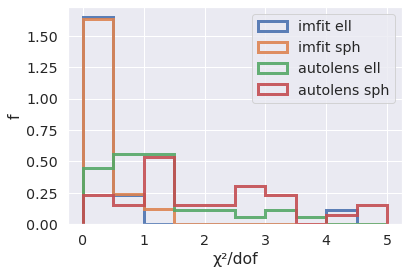

In [9]:
plt.hist(imfit_lens_light_ell['chiquad_dof'], range=(0, 5.), histtype='step', alpha=0.9, label='imfit ell', lw=3., density=True)
plt.hist(imfit_lens_light_sph['chiquad_dof'], range=(0, 5.), histtype='step', alpha=0.9, label='imfit sph', lw=3., density=True)
plt.hist(autolens_results['chi_quad_dof_ell'], range=(0, 5.), histtype='step', alpha=0.9, label='autolens ell', lw=3., density=True)
plt.hist(autolens_results['chi_quad_dof_sph'], range=(0, 5.), histtype='step', alpha=0.9, label='autolens sph', lw=3., density=True)

plt.xlabel('χ²/dof')
plt.ylabel('f')
plt.legend();